In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_dir=r'/content/drive/MyDrive/1_final_dataset/only images_all class'

In [4]:
IMAGE_SIZE=224
BATCH_SIZE=64

#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 5638 images belonging to 12 classes.
Found 620 images belonging to 12 classes.


In [6]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(12,activation='softmax'))

In [7]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])


In [8]:
history=cnn.fit(train_datagen,epochs=20,validation_data=test_datagen)


Epoch 1/20


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


41/89 [============>.................] - ETA: 18:44 - loss: 2.4754 - accuracy: 0.1235

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 99 bytes but only got 74. Skipping tag 45059
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/JpegImagePlugin.py:792: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


89/89 [==============================] - 2324s 26s/step - loss: 2.4668 - accuracy: 0.1243 - val_loss: 2.4148 - val_accuracy: 0.1500
Epoch 2/20
89/89 [==============================] - 334s 4s/step - loss: 2.3551 - accuracy: 0.1972 - val_loss: 2.2980 - val_accuracy: 0.2016
Epoch 3/20
89/89 [==============================] - 336s 4s/step - loss: 2.2007 - accuracy: 0.2586 - val_loss: 2.0985 - val_accuracy: 0.3048
Epoch 4/20
89/89 [==============================] - 331s 4s/step - loss: 2.0919 - accuracy: 0.2973 - val_loss: 2.0614 - val_accuracy: 0.3129
Epoch 5/20
89/89 [==============================] - 330s 4s/step - loss: 2.0143 - accuracy: 0.3350 - val_loss: 2.0102 - val_accuracy: 0.3355
Epoch 6/20
89/89 [==============================] - 335s 4s/step - loss: 1.9510 - accuracy: 0.3544 - val_loss: 1.9419 - val_accuracy: 0.3323
Epoch 7/20
89/89 [==============================] - 333s 4s/step - loss: 1.9033 - accuracy: 0.3684 - val_loss: 1.9066 - val_accuracy: 0.3516
Epoch 8/20
89/89 [====

In [9]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 32)        

In [15]:
from keras.models import load_model
cnn.save("/content/best_model.h5")

In [16]:
history=history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
import matplotlib.pyplot as plt


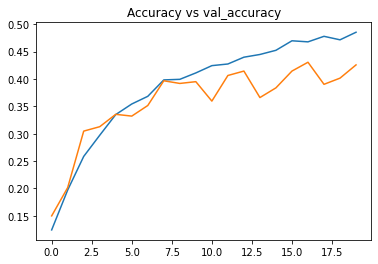

In [24]:
# plt.plot(history['loss'])
plt.plot(history['accuracy'])
# plt.plot(history['val_loss'])
plt.plot(history['val_accuracy'])

plt.title("Accuracy vs val_accuracy")
plt.show()

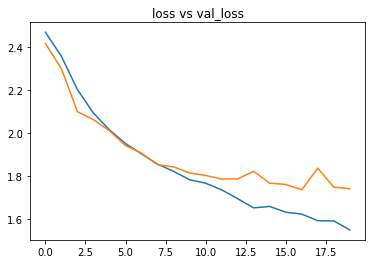

In [25]:
plt.plot(history['loss'])
# plt.plot(history['accuracy'])
plt.plot(history['val_loss'])
# plt.plot(history['val_accuracy'])

plt.title("loss vs val_loss")
plt.show()

In [ ]:
from keras.preprocessing import image
# from tensorflow.keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
!pip install load_img
!pip install img_to_array

In [51]:
print (train_datagen.class_indices)

labels = '\n'.join(sorted(train_datagen.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)




{'baby': 0, 'bottle': 1, 'box': 2, 'defect': 3, 'electronics': 4, 'illegal': 5, 'luggage': 6, 'medicine': 7, 'metal': 8, 'person': 9, 'pet': 10, 'sport': 11}


In [52]:
path = 'labels.txt'
label = np.array(open(path).read().splitlines())

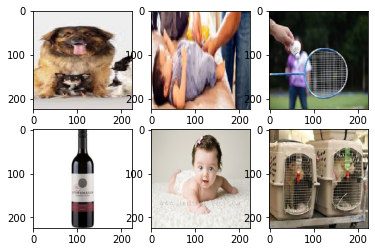

In [69]:
# path ='/content/drive/MyDrive/1_final_dataset/only images_all class/luggage/luggage(100).jpg'
# img=image.load_img(path, target_size=(224,224))

# i=image.img_to_array
import numpy as np
import glob
import os,  random
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

base_path = '/content/drive/MyDrive/1_final_dataset/Train_Test/Test'
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

for i, img_path in enumerate(random.sample(img_list, 6)):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img, dtype=np.uint8)
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())


1/1 [==============================] - 0s 30ms/step
(1, 12)
baby


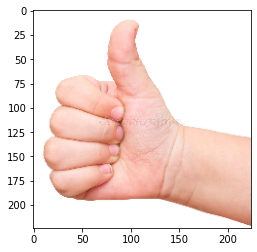

In [77]:
img_path = '/content/drive/MyDrive/train test/test/baby/baby(549).jpg'

img=np.array(img)
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img, dtype=np.uint8)
plt.imshow(img.squeeze())
p=cnn.predict(img[np.newaxis])
print(p.shape)
predicted_class = label[np.argmax(p)]
print(predicted_class)


In [ ]:
# plt.imshow(img.squeeze())
# p=history.predict(img[np.newaxis])
# print(p.shape)
# predicted_class = label[np.argmax(p)]
# print(predicted_class)

# if prediction ==0:
#   print("It is a image of baby")
# elif prediction ==1:
#   print("It is a image of bottle")
# elif prediction ==2:
#   print("It is a image of box")
# elif prediction ==3:
#   print("It is a image of defect")
# elif prediction ==4:
#   print("It is a image of electronics")
# elif prediction ==5:
#   print("It is a image of illegal")
# elif prediction ==6:
#   print("It is a image of luggage")
# elif prediction ==7:
#   print("It is a image of medicine")
# elif prediction ==8:
#   print("It is a image of metal")
# elif prediction ==9:
#   print("It is a image of person")
# elif prediction ==10:
#   print("It is a image of pet")
# else:
#   print("It is a image of sport")
